# **Project Title:**
Hotel Guest Preferences



## **Dataset:**
Hotel Booking Demand

# **About the Dataset**

This dataset contains information about hotel and resort bookings from 2013 to 2017.
It helps us understand how guests book rooms, who cancels, and how much revenue the hotels make or lose.

##  **Key Features:**
Booking date –  Unique identifier for each booking
###### when the guest booked the room

Arrival date – Type of property (e.g., city hotel or resort)

Lead time – days between booking and arrival

Nights stayed – total nights

Guests – number of people

Booking channel – Direct, Online Travel Agent, etc.

Customer type – Transient, Group, etc.

Country – guest's origin

Deposit type – No deposit, Refundable, Non-refundable

ADR (Average Daily Rate) – price per night

Status – Checked out or Cancelled

Cancellation (0/1) – whether the booking was cancelled

Revenue – money earned

Revenue Loss – money lost due to cancellations


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import plotly.express as px


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/GNCIPL_AI_ML/Row Data.xlsx'
df = pd.read_excel(path)
display(df.head())

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0


In [4]:
df.shape


(119390, 17)

In [5]:
df.columns

Index(['Booking ID', 'Hotel', 'Booking Date', 'Arrival Date', 'Lead Time',
       'Nights', 'Guests', 'Distribution Channel', 'Customer Type', 'Country',
       'Deposit Type', 'Avg Daily Rate', 'Status', 'Status Update',
       'Cancelled (0/1)', 'Revenue', 'Revenue Loss'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Booking ID            119390 non-null  int64         
 1   Hotel                 119390 non-null  object        
 2   Booking Date          119390 non-null  datetime64[ns]
 3   Arrival Date          119390 non-null  datetime64[ns]
 4   Lead Time             119390 non-null  int64         
 5   Nights                119390 non-null  int64         
 6   Guests                119390 non-null  int64         
 7   Distribution Channel  119390 non-null  object        
 8   Customer Type         119390 non-null  object        
 9   Country               118902 non-null  object        
 10  Deposit Type          119390 non-null  object        
 11  Avg Daily Rate        119390 non-null  float64       
 12  Status                119390 non-null  object        
 13 

In [7]:
df.describe()

,Booking ID,Booking Date,Arrival Date,Lead Time,Nights,Guests,Avg Daily Rate,Status Update,Cancelled (0/1),Revenue,Revenue Loss
count,119390.000000,119390,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000
mean,59695.500000,2016-05-16 16:23:19.353379840,2016-08-28 16:39:45.727447808,104.011416,3.427900,1.968239,101.831122,2016-07-30 00:24:47.883407104,0.370416,247.931966,-109.916242
min,1.000000,2013-06-24 00:00:00,2015-07-01 00:00:00,0.000000,0.000000,0.000000,-6.380000,2014-10-17 00:00:00,0.000000,-63.800000,-6300.000000
25%,29848.250000,2015-11-28 00:00:00,2016-03-13 00:00:00,18.000000,2.000000,2.000000,69.290000,2016-02-01 00:00:00,0.000000,0.000000,0.000000
50%,59695.500000,2016-05-04 00:00:00,2016-09-06 00:00:00,69.000000,3.000000,2.000000,94.575000,2016-08-07 00:00:00,0.000000,176.000000,0.000000
75%,89542.750000,2016-12-09 00:00:00,2017-03-18 00:00:00,160.000000,4.000000,2.000000,126.000000,2017-02-08 00:00:00,1.000000,342.977500,0.000000
max,119390.000000,2017-08-31 00:00:00,2017-08-31 00:00:00,737.000000,69.000000,55.000000,5400.000000,2017-09-14 00:00:00,1.000000,7590.000000,0.000000
std,34465.068657,NaN,NaN,106.863097,2.557439,0.722394,50.535790,NaN,0.482918,300.921393,277.102641


# **Dataset Observation**

**1. Booking Information**

Booking ID – Unique ID for each booking

Hotel  – City hotel or resort

Booking Date – When the booking was made

Arrival Date – Guest check-in date

Lead Time – Days between booking and arrival

Nights – Number of nights booked

**2. Guest Details**

Guests – Total number of guests

Country – Guest’s home country

Customer Type – Transient, Group, etc.

**3. Booking Channel & Payment**

Distribution Channel – Direct, OTA, Corporate, etc.

Deposit Type – No deposit, Non-refundable, etc.

ADR (Average Daily Rate) – Price per night

**4. Booking Outcome**

Status – Checked-out or Cancelled

Cancelled (0/1) – Binary cancellation flag

Status Update – Last date of status change

**5.** **Revenue Metrics**

Revenue – Money earned from successful stays

Revenue Loss – Estimated loss from cancellations

# **Data Cleaning**

In [8]:
# check missing values
df.isnull().sum()

,0
Booking ID,0
Hotel,0
Booking Date,0
Arrival Date,0
Lead Time,0
Nights,0
Guests,0
Distribution Channel,0
Customer Type,0
Country,488


In country columns there is 488 columns missing values

In [9]:
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])

In [10]:
df['Country'].isnull().sum()

np.int64(0)

In [11]:
# check duplicate values

df.duplicated().sum()

np.int64(0)

# displays the number of unique values for each column in the DataFrame

In [12]:
df.nunique()

,0
Booking ID,119390
Hotel,2
Booking Date,984
Arrival Date,793
Lead Time,479
Nights,45
Guests,15
Distribution Channel,5
Customer Type,4
Country,174


The overview information is 'Booking ID' has 119390 unique values , 'Hotel' has 2 unique values ,etc

In [13]:
# separate numerical columns and categorical columns

num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [14]:
num_cols

Index(['Booking ID', 'Lead Time', 'Nights', 'Guests', 'Avg Daily Rate',
       'Cancelled (0/1)', 'Revenue', 'Revenue Loss'],
      dtype='object')

In [15]:
cat_cols

Index(['Hotel', 'Distribution Channel', 'Customer Type', 'Country',
       'Deposit Type', 'Status'],
      dtype='object')

# fix inconsistent

In [16]:
 # remove bookings with 0 nights
df = df[df['Nights'] > 0]

In [17]:
# Remove bookings with 0 guests
df = df[df['Guests'] > 0]

In [18]:
# Remove negative lead time if any
df = df[df['Lead Time'] >= 0]

# **PreProcessing**

In [19]:
# This line converts the values in the 'Status Update' column into proper datetime format
df['Status Update'] = pd.to_datetime(df['Status Update'])

In [20]:
df['Status Update'].head()

,Status Update
2,2015-07-02
3,2015-07-02
4,2015-07-03
5,2015-07-03
6,2015-07-03


In [21]:
df['Booking Date'] = pd.to_datetime(df['Booking Date'])

In [22]:
df['Arrival Date'] = pd.to_datetime(df['Arrival Date'])

# check Outliers

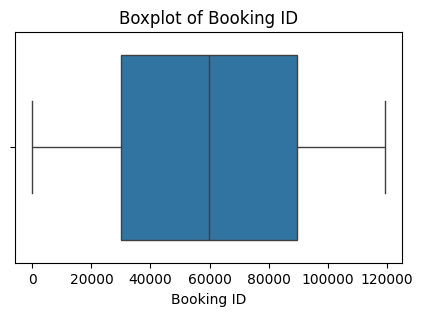

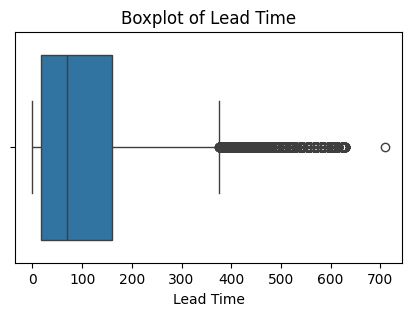

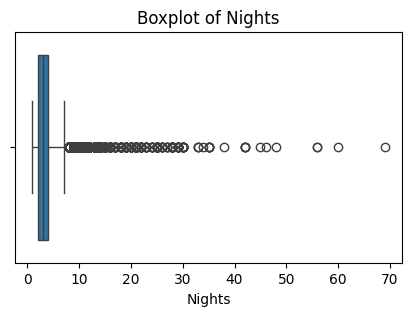

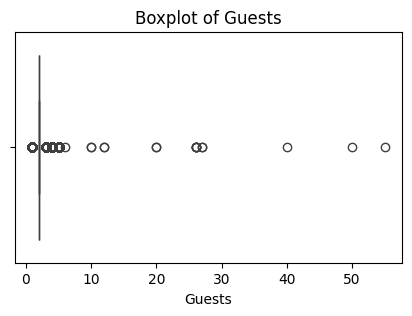

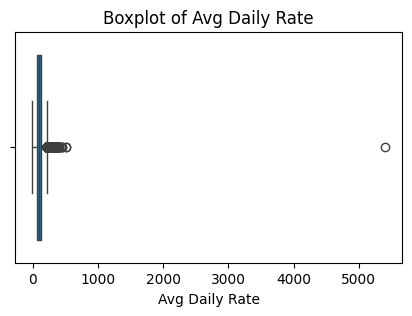

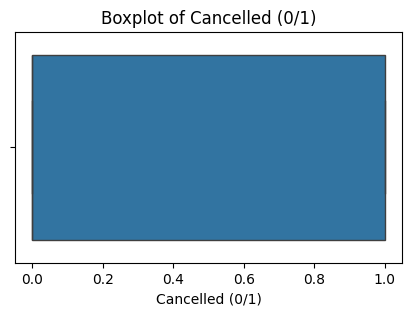

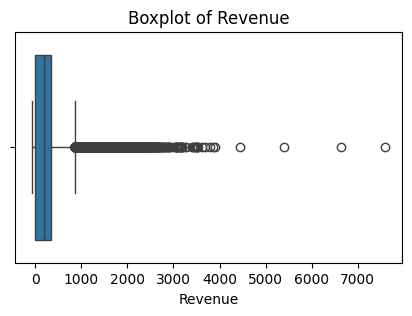

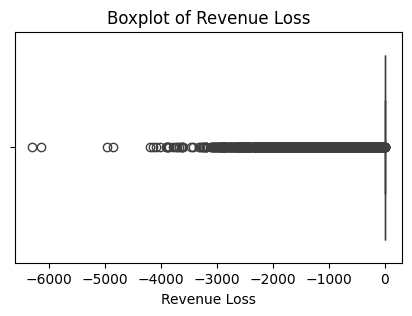

In [23]:
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [24]:
outlier_report = {}

for col in num_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

  outlier_report[col] = len(outliers)
outlier_report

{'Booking ID': 0,
 'Lead Time': 2978,
 'Nights': 5226,
 'Guests': 36908,
 'Avg Daily Rate': 3891,
 'Cancelled (0/1)': 0,
 'Revenue': 5026,
 'Revenue Loss': 29517}

### To treat outliers using the IQR capping method.

In [25]:
columns_to_treat = ['Lead Time', 'Nights', 'Guests', 'Avg Daily Rate', 'Revenue', 'Revenue Loss']

for col in columns_to_treat:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    outlier_report[col] = len(outliers)
    print(col, len(outliers))


print("Outliers treated using IQR capping for the specified columns.")

Lead Time 0
Nights 0
Guests 0
Avg Daily Rate 0
Revenue 0
Revenue Loss 0
Outliers treated using IQR capping for the specified columns.


In [26]:
df.shape

(118565, 17)

# Feature Engineering

Lead time is the days between booking and arrival


In [27]:
df['Lead Time'] = df['Arrival Date'] - df['Booking Date']

# Time-Based Columns:
Extracted Year of Booking,Month of Booking, Day of Booking from Booking Date

In [28]:
df['Year of Booking']=df['Booking Date'].dt.year

In [29]:
df['Month of Booking']=df['Booking Date'].dt.month_name()

In [30]:
df['Weekday of Booking']=df['Booking Date'].dt.day_name()

Extracted year,Month , Day from Arrival Date

In [31]:
df['Year of Arrival']=df['Arrival Date'].dt.year

In [32]:
df['Month of Arrival']=df['Arrival Date'].dt.month_name()


In [33]:
df['Weekday of Arrival']=df['Arrival Date'].dt.day_name()

In [34]:
peak_months = ['June', 'July', 'August', 'December']
df['Is_Peak_Season'] = df['Month of Arrival'].isin(peak_months).astype(int)


In [35]:
df['Lead Time'].head()

,Lead Time
2,7 days
3,13 days
4,14 days
5,14 days
6,0 days


In [36]:
# Convert 'Lead Time' from timedelta to numerical value
df['Lead Time'] = df['Lead Time'].dt.days

In [37]:
df['Lead Time'].head()

,Lead Time
2,7
3,13
4,14
5,14
6,0


In [38]:
# customer value feature
df["Customer_Value"] = df["Revenue"] - df["Revenue Loss"]


# EDA

In [39]:
df['Cancelled (0/1)'].value_counts()

,count
Cancelled (0/1),
0,74389
1,44176


In [40]:
# Distribution of cancellation
fig = px.histogram(df, x='Cancelled (0/1)', title='Distribution of Cancelled vs. Not Cancelled Bookings', color='Cancelled (0/1)', category_orders={'Cancelled (0/1)': [0, 1]})
fig.update_layout(xaxis=dict(tickmode='array', tickvals=[0, 1], ticktext=['Not Cancelled', 'Cancelled']))
fig.show()

In [41]:
df['Hotel'].value_counts()

,count
Hotel,
City,78899
Resort,39666


## Visualizing 'Hotel' Column

In [42]:
hotel_counts = df['Hotel'].value_counts().reset_index()
hotel_counts.columns = ['Hotel Type', 'Count']

fig = px.bar(hotel_counts, x='Hotel Type', y='Count', title='Distribution of Hotel Types', color='Hotel Type')
fig.show()

## Hotel Type vs. Cancellations

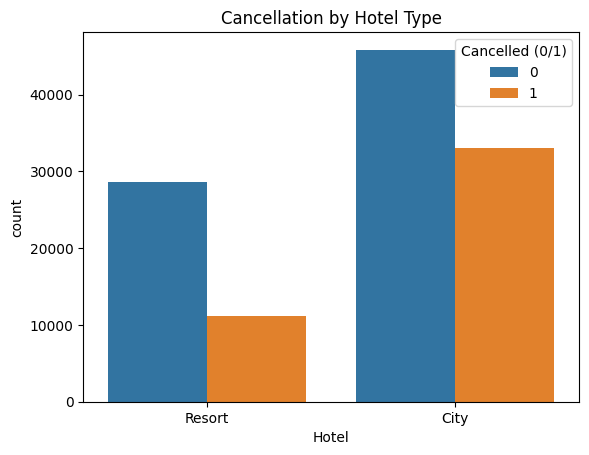

In [43]:
sns.countplot(x='Hotel', hue='Cancelled (0/1)', data=df)
plt.title("Cancellation by Hotel Type")
plt.show()


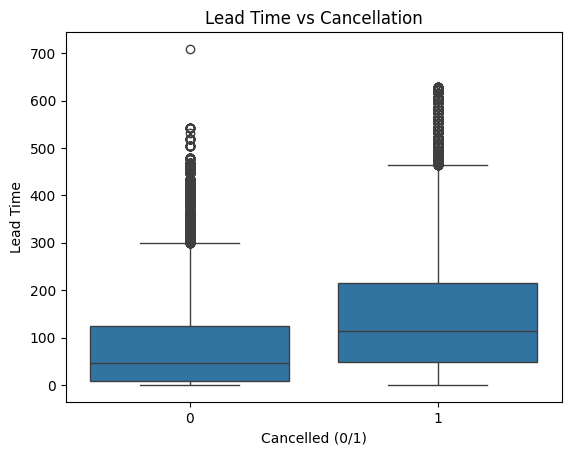

In [44]:
# lead time vs Cancellation
sns.boxplot(x='Cancelled (0/1)', y='Lead Time', data=df)
plt.title("Lead Time vs Cancellation")
plt.show()


### It shows Hotels usually see higher cancellations when lead time is high.

## Average Daily Rate (ADR) vs. Cancellation

In [45]:
fig = px.box(df, x='Cancelled (0/1)', y='Avg Daily Rate', title='Average Daily Rate Distribution for Cancelled vs. Not Cancelled Bookings', labels={'IsCancelled': 'Cancellation Status', 'Avg Daily Rate': 'Average Daily Rate'})
fig.update_layout(xaxis=dict(tickmode='array', tickvals=[0, 1], ticktext=['Not Cancelled', 'Cancelled']))
fig.show()

### This plot show the distribution of ADR for both cancelled and not cancelled bookings.

## Monthly Booking Distribution

In [46]:
monthly_bookings = df['Month of Booking'].value_counts().reset_index()
monthly_bookings.columns = ['Month', 'Count']

# Ensure months are in chronological order for better visualization
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_bookings['Month'] = pd.Categorical(monthly_bookings['Month'], categories=month_order, ordered=True)
monthly_bookings = monthly_bookings.sort_values('Month')

fig = px.bar(monthly_bookings, x='Month', y='Count', title='Monthly Booking Distribution', color='Month')
fig.show()

# Peak Season Analysis

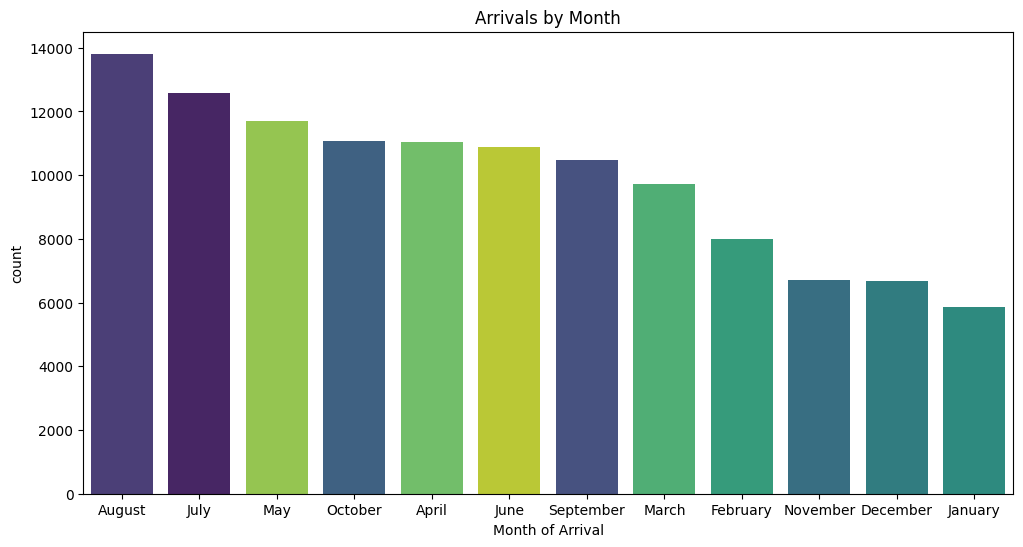

In [47]:
plt.figure(figsize=(12, 6)) # Set a custom figure size
sns.countplot(x='Month of Arrival', data=df, order=df['Month of Arrival'].value_counts().index, hue='Month of Arrival', palette='viridis', legend=False)
plt.title("Arrivals by Month")
plt.show()

## Top 10 Guest Countries

In [48]:
top_10_countries = df['Country'].value_counts().head(10).reset_index()
top_10_countries.columns = ['Country', 'Count']

fig = px.bar(top_10_countries, x='Country', y='Count', title='Top 10 Guest Countries', color='Country')
fig.show()

In [49]:
# One hot encoding on categorical columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)


# KNN

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [51]:
# Select target variable (Classification)
y = df['Cancelled (0/1)']

# Drop target + irrelevant ID columns + date columns from X
X = df.drop(columns=[
    'Cancelled (0/1)',
    'Booking ID',
    'Booking Date',
    'Arrival Date',
    'Status Update'
])

In [52]:
# One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)


In [53]:
#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [54]:
#  Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [55]:
#  KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

print("KNN Model trained successfully!")


KNN Model trained successfully!


In [56]:
# Make predictions on the scaled test data using the trained KNN model
y_pred_knn = knn.predict(X_test_scaled)

# Calculate evaluation metrics for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

In [57]:
print("Accuracy score :", accuracy_knn)

Accuracy score : 0.9463585375110699


In [58]:
print("Precision score",precision_knn)
print("Recall score :",recall_knn)
print("F1 score :",f1_knn)
print("Confusion matrix :",conf_matrix_knn)

Precision score 0.9554049232964681
Recall score : 0.8995633187772926
F1 score : 0.9266435986159169
Confusion matrix : [[14407   375]
 [  897  8034]]


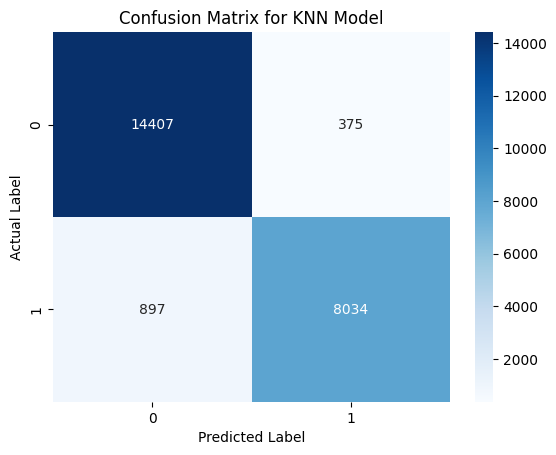

In [59]:
# Plot confusion matrix
sns.heatmap(conf_matrix_knn,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for KNN Model')
plt.show()


# Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# create logistic regression model
log_reg_model = LogisticRegression(max_iter=500)
log_reg_model.fit(X_train_scaled, y_train)

# Predict
y_pred_log = log_reg_model.predict(X_test_scaled)

# check performance
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))



Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14782
           1       1.00      1.00      1.00      8931

    accuracy                           1.00     23713
   macro avg       1.00      1.00      1.00     23713
weighted avg       1.00      1.00      1.00     23713



In [61]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_log)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0


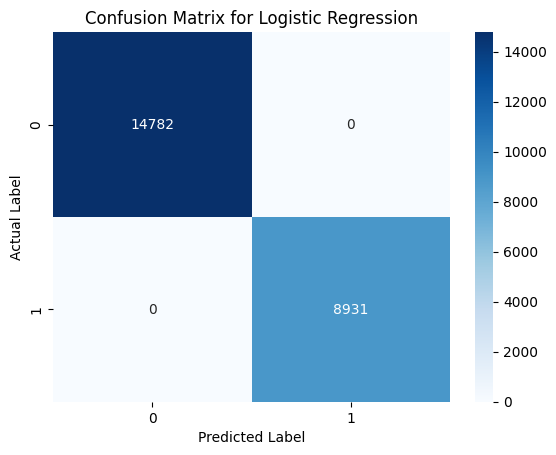

In [62]:
# confusion matrix
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# XGBoost Classifier

In [63]:
import xgboost as xgb
from xgboost import XGBClassifier

# create the xgboost classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# make prediction on test data
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))



Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14782
           1       1.00      1.00      1.00      8931

    accuracy                           1.00     23713
   macro avg       1.00      1.00      1.00     23713
weighted avg       1.00      1.00      1.00     23713



# K-Means

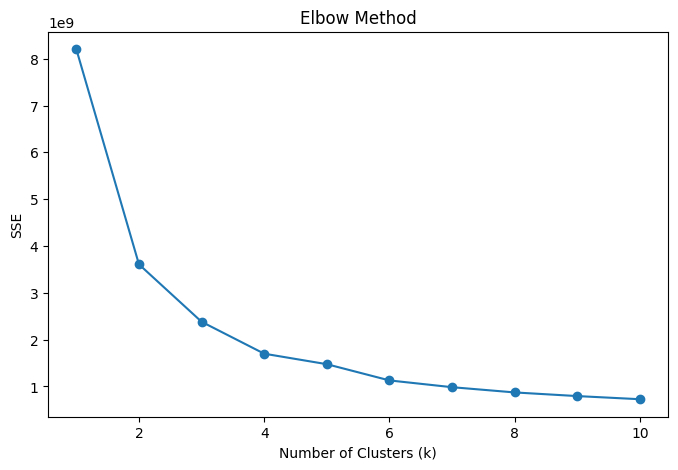

Silhouette Score: 0.7882223406396554


In [ ]:
# ====== IMPORTS ======
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# ====== REMOVE NON-FEATURE COLUMNS ======
X_cluster = df.drop(columns=[
    'Cancelled (0/1)',
    'Booking ID',
    'Booking Date',
    'Arrival Date',
    'Status Update',
    'Year of Booking',
    'Month of Booking',
    'Weekday of Booking',
    'Year of Arrival',
    'Month of Arrival',
    'Weekday of Arrival',
    'Customer_Value'
])

# ====== ONE-HOT ENCODING ======
X_cluster = pd.get_dummies(X_cluster, drop_first=True)

# ====== ELBOW METHOD ======
sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    km.fit(X_cluster)
    sse.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.show()

# ====== SCALING ======
scaler_cluster = StandardScaler()
X_scaled = scaler_cluster.fit_transform(X_cluster)

# ====== FINAL KMEANS MODEL ======
k_optimal = 2 # (Assuming selected from elbow)
km_final = KMeans(n_clusters=k_optimal, random_state=42, n_init='auto')
km_final.fit(X_scaled)

clusters = km_final.labels_

# ====== SILHOUETTE SCORE ======
sil_score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", sil_score)




# Hierarchical Clustering with Dendogram

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Remove columns you should NOT use in clustering
X_hier = df.drop(columns=[
    'Cancelled (0/1)', 'Booking ID', 'Booking Date', 'Arrival Date',
    'Status Update', 'Year of Booking', 'Month of Booking',
    'Weekday of Booking', 'Year of Arrival', 'Month of Arrival',
    'Weekday of Arrival', 'Customer_Value'])


In [ ]:
# One-hot encode categorical columns for hierarchical clustering
X_hier = pd.get_dummies(X_hier, drop_first=True)

# sample of 1000 rows for dendrogram
X_sample = X_hier.sample(1000, random_state=42)



In [ ]:
# perform hierarchical clustering with ward method
#Z = linkage(X_hier, method='ward')
Z = linkage(X_sample, method='ward')



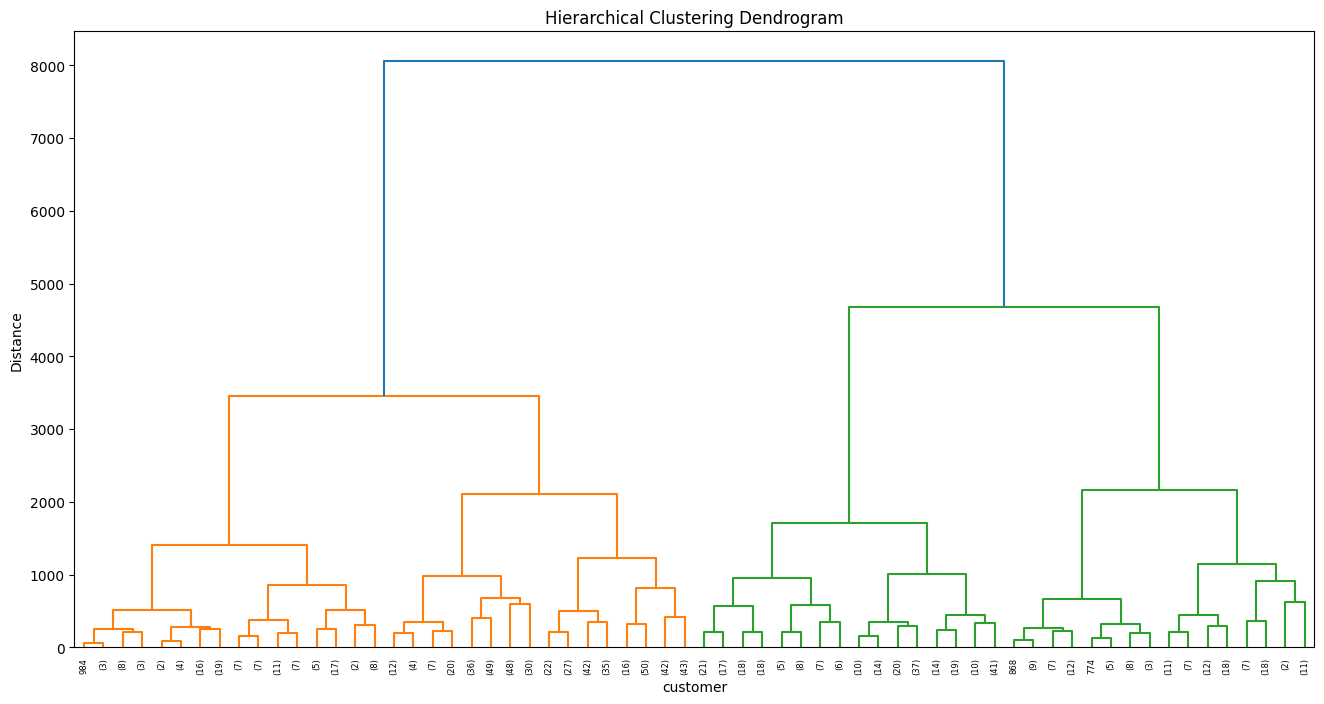

In [ ]:
plt.figure(figsize=(16, 8))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('customer')
plt.ylabel('Distance')
plt.show()